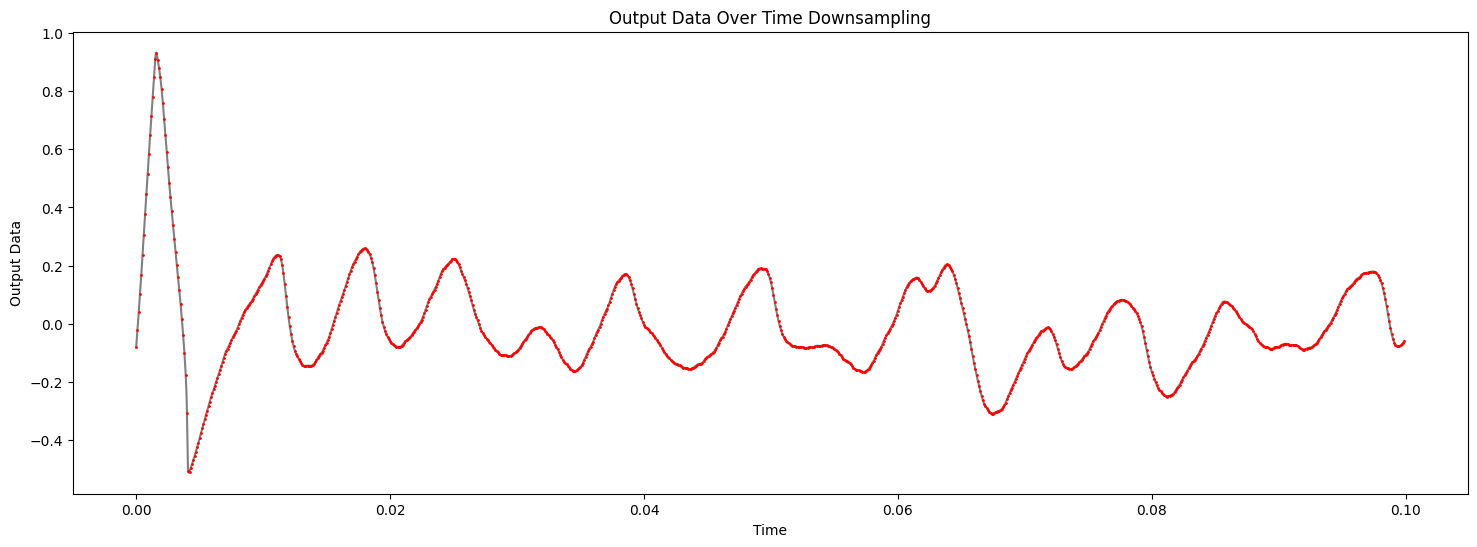

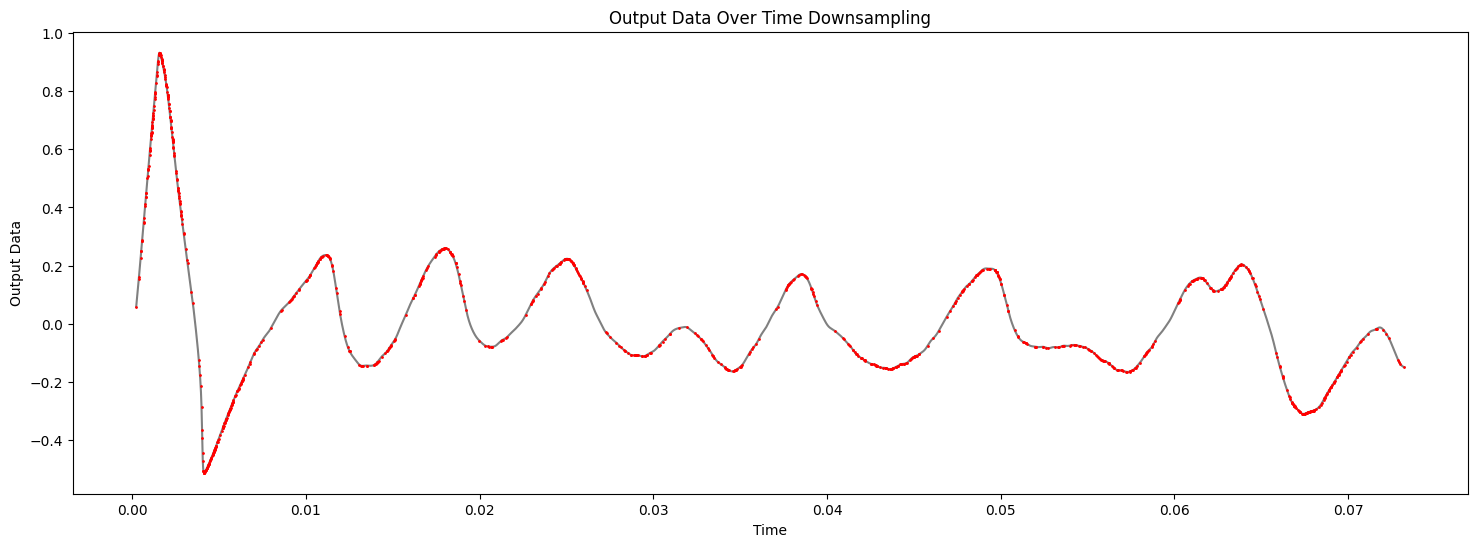

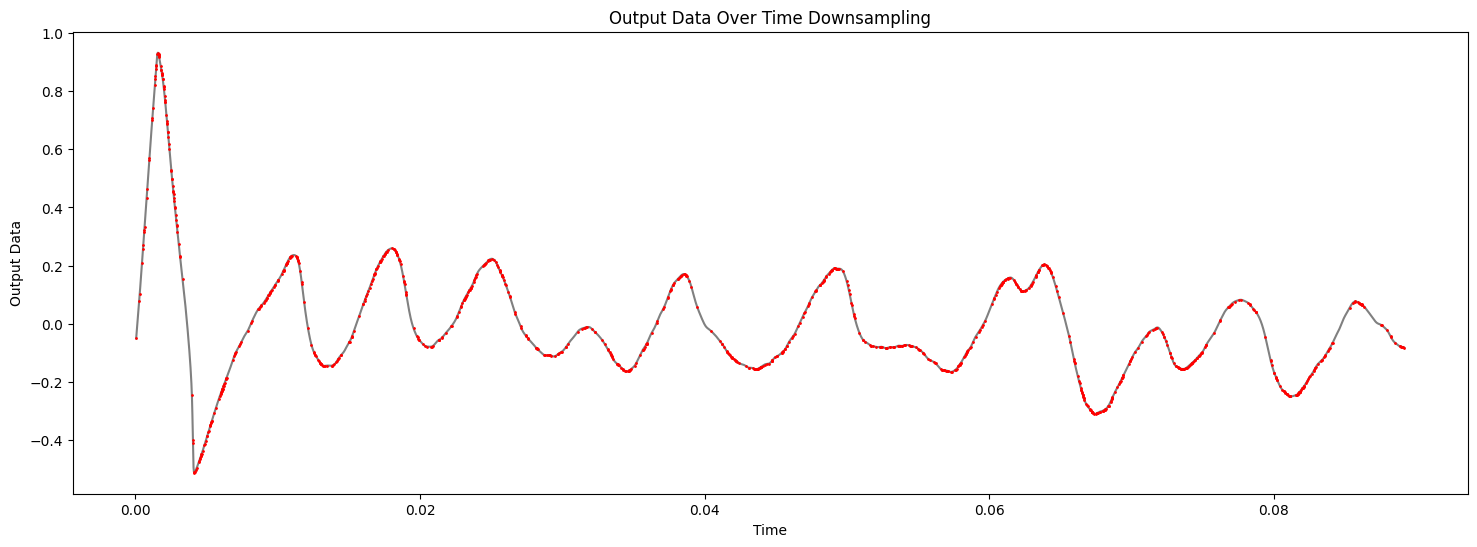

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import math

a = '050'
timeHistorySizeOfU=100
downsampling_factor=3


hf = h5py.File('data/Kornilov_Haeringer_all.h5', 'r')

input_size = math.ceil(timeHistorySizeOfU/downsampling_factor)

output_data = np.array(hf.get('BB_A' + a+ '_Q'))
input_data = np.array(hf.get('BB_A' + a+ '_U'))
time_data = np.array(hf.get('BB_time'))

def graph_sampling(time_data, output_data, time_data_downsampled, output_data_downsampled):

    time_data_downsampled = time_data_downsampled[:1000]
    output_data_downsampled = output_data_downsampled[:1000]

    indeces = np.where((time_data <= time_data_downsampled[-1]) & (time_data >= time_data_downsampled[0]))
    time_data = time_data[indeces]
    output_data = output_data[indeces]


    # Plot the original output data over time
    plt.figure(figsize=(18, 6))
    plt.plot(time_data, output_data, color='gray')

    # Highlight the downsampled points with red dots and connect them with a different color line
    plt.plot(time_data_downsampled, output_data_downsampled, 'o', color='red', markersize=1)

    # Add labels and legend
    plt.xlabel('Time')
    plt.ylabel('Output Data')
    plt.title('Output Data Over Time Downsampling')

    # Show the plot
    plt.show()
    plt.close()

# Another possibility is to focus on where derivatives are the highest!

def downsampling(time_data, input_data, output_data, downsampling_factor = 100, mode = 'uniform'):


    if mode == "non-uniform-1":
        # Calculate importance scores
        importance_scores = np.abs(output_data)

        # Normalize the importance scores to form a probability distribution
        probability_distribution = importance_scores / np.sum(importance_scores)

        # Create the cumulative distribution function (CDF)
        cdf = np.cumsum(probability_distribution)

        # Determine the number of samples to keep
        num_samples = math.ceil(len(output_data) / downsampling_factor)

        # Use inverse transform sampling to select indices based on the CDF
        random_values = np.random.rand(num_samples)
        selected_indices = np.searchsorted(cdf, random_values)

        # Downsample the input, output, and time data
        input_data_downsampled = input_data[selected_indices]
        output_data_downsampled = output_data[selected_indices]
        time_data_downsampled = time_data[selected_indices]

        sorted_indices = np.argsort(time_data_downsampled)
        time_data_new = time_data_downsampled[sorted_indices]
        output_data_new = output_data_downsampled[sorted_indices]
        input_data_new = input_data_downsampled[sorted_indices]
    
    if mode == "non-uniform-2":
        # Calculate importance scores
        importance_scores = np.sqrt(np.abs(output_data))

        # Normalize the importance scores to form a probability distribution
        probability_distribution = importance_scores / np.sum(importance_scores)

        # Create the cumulative distribution function (CDF)
        cdf = np.cumsum(probability_distribution)

        # Determine the number of samples to keep
        num_samples = math.ceil(len(output_data) / downsampling_factor)

        # Use inverse transform sampling to select indices based on the CDF
        random_values = np.random.rand(num_samples)
        selected_indices = np.searchsorted(cdf, random_values)

        # Downsample the input, output, and time data
        input_data_downsampled = input_data[selected_indices]
        output_data_downsampled = output_data[selected_indices]
        time_data_downsampled = time_data[selected_indices]

        sorted_indices = np.argsort(time_data_downsampled)
        time_data_new = time_data_downsampled[sorted_indices]
        output_data_new = output_data_downsampled[sorted_indices]
        input_data_new = input_data_downsampled[sorted_indices]

    
    if mode == "uniform":
        output_data_new = output_data[::downsampling_factor]
        input_data_new = input_data[::downsampling_factor]
        time_data_new = time_data[::downsampling_factor]

    
    graph_sampling(time_data, output_data, time_data_new, output_data_new)

    return time_data_new, input_data_new, output_data_new

t, ins, out = downsampling(time_data, input_data, output_data, mode='uniform')
t, ins, out = downsampling(time_data, input_data, output_data, mode='non-uniform-1')
t, ins, out = downsampling(time_data, input_data, output_data, mode='non-uniform-2')

